In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sklearn.datasets

In [11]:
X,y = sklearn.datasets.make_moons(200,noise=0.15)

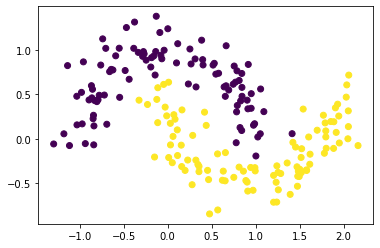

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
X.shape

(200, 2)

In [15]:
# Hyperparameters
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01


In [ ]:
model_dic = {'W1': W1, 'b1': b1,'W2': W2, 'b2': b2}

In [17]:
def retrieve(model_dict):
    W1 = model_dic['W1']
    b1 = model_dic['b1']
    W2 = model_dic['W2']
    b2 = model_dic['b2']
    return W1,b1,W2,b2


In [19]:
def forward(x, model_dict):
    W1,b1,W2,b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, dim=1, keepdims=True)
    return softmax
    

In [20]:
def loss(softmax, y):
    W1,b1,W2,b2 = retrieve(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(predicted)
    softmax_loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2*(np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss = softmax_loss + reg_loss
    return float(loss/y.shape[0])

In [ ]:
softmax = np.random.randn(200,2)
